# Ch2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

sns.set()
%matplotlib inline

In [47]:
# Yelpのデータからビジネスカテゴリーの頻度分布を出力
# 列のデータの頻度分布を見ることで、確率の分布について観察できる

with open('./business.json') as file:
    
    biz_df=pd.DataFrame([ json.loads(line) for line in file])

biz_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
4,581 Howe Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH


Text(0,0.5,'Occurrence')

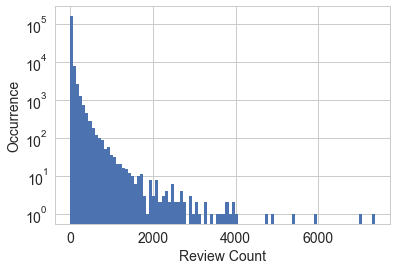

In [17]:
# レビューカウントの頻度分布
sns.set_style('whitegrid')
fig,ax=plt.subplots()

biz_df.review_count.hist(ax=ax,bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)

ax.set_xlabel('Review Count',fontsize=14)
ax.set_ylabel('Occurrence',fontsize=14)



- データが多すぎるため、binで区切り、一部のデータを捨てる。
-  どのようにbinの幅をきめるか?

## fixed-width-binning
- binの幅を固定して分割
- シンプルだが、頻度に極端な差があると、空白のbinが多数生じてしまうリスクがある

## quantile-binning
- 特定の分位点で区切る
- データ量の1/nラインで区切るためそれぞれのbinが空白になることはない

Text(0,0.5,'Occurrence')

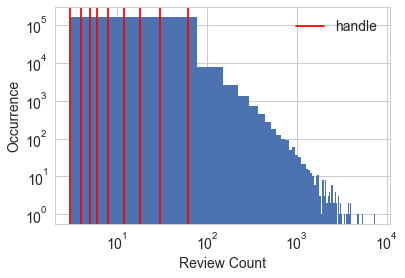

In [18]:
# 分位点を頻度分布に上書き
decliles=biz_df.review_count.quantile(np.arange(0.1,1.0,0.1))

sns.set_style('whitegrid')
fig,ax=plt.subplots()

biz_df.review_count.hist(ax=ax,bins=100)

for pos in decliles:
    handle=plt.axvline(pos,color='r')
    
ax.legend([handle],['handle'],fontsize=14)    
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)

ax.set_xlabel('Review Count',fontsize=14)
ax.set_ylabel('Occurrence',fontsize=14)


In [4]:
# オンラインニュースのデータ

df_news=pd.read_csv('./OnlineNewsPopularity.csv')

df_news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


/Users/hasehiro/.pyenv/versions/3.6.5/envs/pycoon/lib/python3.6/site-packages/numpy/lib/scimath.py:310: RuntimeWarning: divide by zero encountered in log10
  return nx.log10(x)


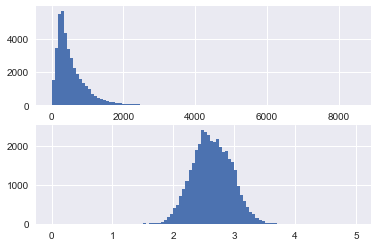

In [38]:
# logを取るとGauss分布に近くなる
fig,(ax1,ax2)=plt.subplots(2,1)

df_news['log_n_tokens_content']=df_news[' n_tokens_content'].map(sp.log10)

df_news[' n_tokens_content'].hist(ax=ax1,bins=100)
df_news['log_n_tokens_content'].hist(ax=ax2,bins=100,range=(0,5))


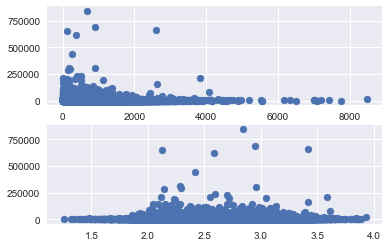

In [46]:
# log変換することで、意味がある場合と、ない場合がある
# そのことを散布図で確かめる
# news記事の文字数と、シェアされる数の関係を予測したいとする

fig2,(ax1,ax2)=plt.subplots(2,1)

ax1.scatter(df_news[' n_tokens_content'],df_news[' shares'])
ax2.scatter(df_news['log_n_tokens_content'],df_news[' shares'])

- x軸をlogに変換することで、より密になり、なだらかになる
- 変換しないと、inputの微妙なズレで、一気に予測値が変わってしまうことになる

-  yelpのデータの場合、ポアソン分布のように、分散が大きく、うまく正規分布のようにならない
- このような場合box cox 変換をおこなう

In [49]:
# Box Coxはすべての値が正でないとできないので、最小値を確める
biz_df.review_count.min()

3

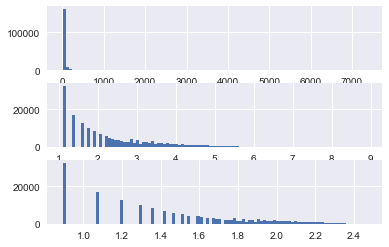

In [61]:
from scipy import  stats
fig,(ax1,ax2,ax3)=plt.subplots(3,1)


# box cox のλ=0はlog変換とおなじになる
biz_df['rc_log']=stats.boxcox(biz_df.review_count,lmbda=0)

# λを最適化した値が自動で入る
biz_df['rc_bc'],bc_param=stats.boxcox(biz_df.review_count)


biz_df['review_count'].hist(ax=ax1,bins=100)
biz_df['rc_log'].hist(ax=ax2,bins=100)
biz_df['rc_bc'].hist(ax=ax3,bins=100)


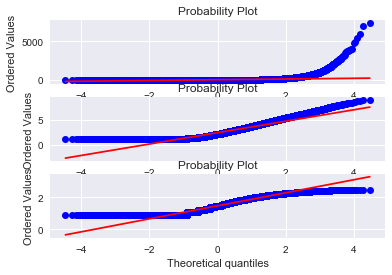

In [67]:
# これらの変換により、どれぐらい正規分布に近づいているか確認するため、plobplotを表示する
# 直線に近づいているほど、正規分布に近似されている
fig,(ax1,ax2,ax3)=plt.subplots(3,1)

_=stats.probplot(biz_df['review_count'],dist=stats.norm,plot=ax1)
_=stats.probplot(biz_df['rc_log'],dist=stats.norm,plot=ax2)
_=stats.probplot(biz_df['rc_bc'],dist=stats.norm,plot=ax3)

## Feature Scaling or Normalization
- どのようなスケーリングも特定の定数で割るだけなので、分布事態に変化はない

In [23]:
from sklearn import preprocessing as preproc
df_news=pd.read_csv('./OnlineNewsPopularity/OnlineNewsPopularity.csv')
# カラムに空白がそんざいするため、除去
df_news.columns=df_news.columns.map(lambda st:st.strip())
# min_max スケーリング
df_news['tc_min_max']=preproc.minmax_scale(df_news[['n_tokens_content']])

# stadnerization
df_news['tc_std']=preproc.StandardScaler().fit_transform(df_news[['n_tokens_content']])

# L2
df_news['tc_l2']=preproc.normalize(df_news[['n_tokens_content']],axis=0)


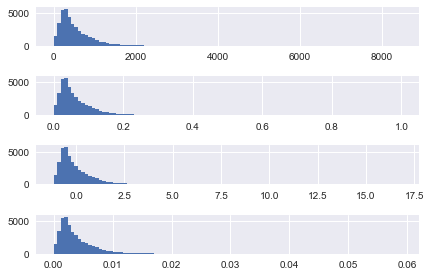

In [36]:
fig,(ax0,ax1,ax2,ax3)=plt.subplots(4,1)

fig.tight_layout()

df_news['n_tokens_content'].hist(ax=ax0,bins=100)
df_news['tc_min_max'].hist(ax=ax1,bins=100)
df_news['tc_std'].hist(ax=ax2,bins=100)
df_news['tc_l2'].hist(ax=ax3,bins=100)

- 分布の形は変わらないが、値の範囲が違う
- スケールの変換は、特徴量間のスケールが異なるときに有用